In [1]:
from keras.models import load_model
from keras import backend as K
from keras.losses import binary_crossentropy
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load preprocessed images
with open('/content/drive/MyDrive/Kaggle/HuBMAP - Hacking the Human Vasculature/Dataset/preprocessed_images.pkl', 'rb') as f:
    preprocessed_images = pickle.load(f)

# Load binary masks
with open('/content/drive/MyDrive/Kaggle/HuBMAP - Hacking the Human Vasculature/Dataset/masks.pkl', 'rb') as f:
    masks = pickle.load(f)


In [4]:
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)
def combined_dice_bce_loss(y_true, y_pred, weight=0.5):
    dice_loss_value = dice_loss(y_true, y_pred)
    bce_loss_value = binary_crossentropy(y_true, y_pred)
    return weight * bce_loss_value + (1 - weight) * dice_loss_value

In [5]:
# Load your trained model
model = load_model('/content/drive/MyDrive/Kaggle/HuBMAP - Hacking the Human Vasculature/model1.h5', 
                   custom_objects={'combined_dice_bce_loss': combined_dice_bce_loss, 'dice_coef': dice_coef})

In [6]:
# Get your image ids
image_ids = list(preprocessed_images.keys())

In [7]:
# Extract just the blood vessels masks from the masks dictionary
masks_blood_vessels = {id_: masks[id_]['blood_vessel'] for id_ in image_ids}


In [8]:
# Get the preprocessed images as a list
images_list = list(preprocessed_images.values())

# Convert the list to a numpy array
images_array = np.array(images_list)

# normalize the images
images_array = images_array/255

# Make predictions
predictions = model.predict(images_array)

46/46 [==============================] - 32s 314ms/step


Predicted mask 1:
 [[[0.01285704]
  [0.00409627]
  [0.00173783]
  ...
  [0.00777623]
  [0.00985447]
  [0.02238969]]

 [[0.00350379]
  [0.00275715]
  [0.00144079]
  ...
  [0.00694883]
  [0.00795632]
  [0.01332027]]

 [[0.00098344]
  [0.00164958]
  [0.00081183]
  ...
  [0.00657548]
  [0.00625012]
  [0.00586441]]

 ...

 [[0.0147054 ]
  [0.01455816]
  [0.0096783 ]
  ...
  [0.00310812]
  [0.00323728]
  [0.00277599]]

 [[0.02101182]
  [0.01624047]
  [0.0128318 ]
  ...
  [0.00308867]
  [0.00411526]
  [0.00577284]]

 [[0.04040478]
  [0.01713173]
  [0.0084711 ]
  ...
  [0.00250018]
  [0.00344046]
  [0.01808806]]]


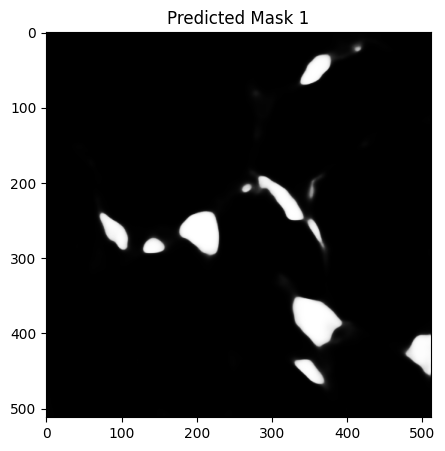

Predicted mask 2:
 [[[0.01324941]
  [0.00420664]
  [0.00162174]
  ...
  [0.00181808]
  [0.00298027]
  [0.00888356]]

 [[0.00313141]
  [0.00250997]
  [0.00126504]
  ...
  [0.00144016]
  [0.00172555]
  [0.00380597]]

 [[0.00076692]
  [0.00139374]
  [0.00067891]
  ...
  [0.0012689 ]
  [0.00129001]
  [0.00120257]]

 ...

 [[0.08826352]
  [0.09310833]
  [0.08864114]
  ...
  [0.0031382 ]
  [0.00297794]
  [0.00244497]]

 [[0.10647639]
  [0.10594808]
  [0.10235964]
  ...
  [0.00346758]
  [0.00441728]
  [0.00593216]]

 [[0.14669049]
  [0.10991282]
  [0.08602618]
  ...
  [0.00244371]
  [0.00338617]
  [0.01782041]]]


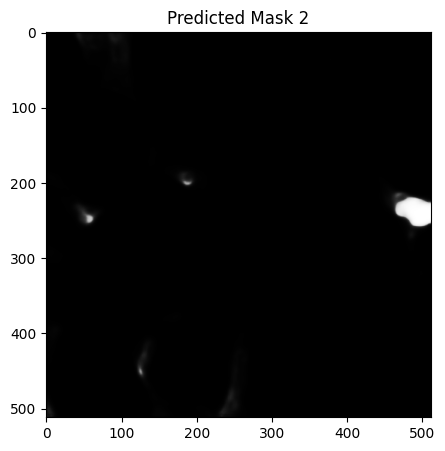

Predicted mask 3:
 [[[0.07397194]
  [0.04135972]
  [0.02338823]
  ...
  [0.00661077]
  [0.00832361]
  [0.02039131]]

 [[0.03823398]
  [0.03265009]
  [0.02415147]
  ...
  [0.0074311 ]
  [0.00773776]
  [0.01205113]]

 [[0.01949169]
  [0.02804265]
  [0.02386448]
  ...
  [0.00591988]
  [0.00611234]
  [0.00473582]]

 ...

 [[0.00795247]
  [0.00893205]
  [0.00642301]
  ...
  [0.00035697]
  [0.00035071]
  [0.00021546]]

 [[0.01475197]
  [0.01062335]
  [0.01009731]
  ...
  [0.00034767]
  [0.00058779]
  [0.00074581]]

 [[0.03202767]
  [0.01230633]
  [0.00654001]
  ...
  [0.00028551]
  [0.00042684]
  [0.00401666]]]


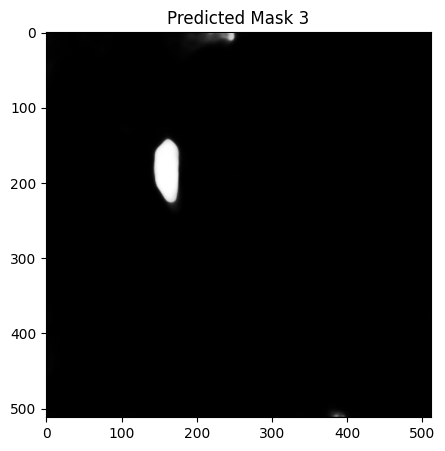

Predicted mask 4:
 [[[0.00708102]
  [0.00213355]
  [0.00068412]
  ...
  [0.00532055]
  [0.00698092]
  [0.01632505]]

 [[0.00143509]
  [0.00105548]
  [0.00047271]
  ...
  [0.00473885]
  [0.00553366]
  [0.00877196]]

 [[0.00030702]
  [0.00052741]
  [0.00029811]
  ...
  [0.00452277]
  [0.00412363]
  [0.00343502]]

 ...

 [[0.01007944]
  [0.01082676]
  [0.00743335]
  ...
  [0.0102358 ]
  [0.01047718]
  [0.00857424]]

 [[0.01499623]
  [0.01192768]
  [0.01094095]
  ...
  [0.01012384]
  [0.01201987]
  [0.01736216]]

 [[0.03286435]
  [0.01339499]
  [0.00703182]
  ...
  [0.00804448]
  [0.01022511]
  [0.03982714]]]


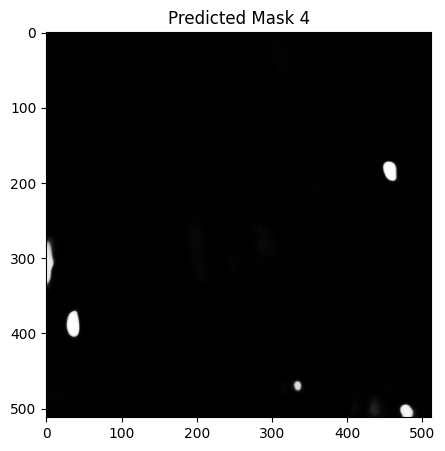

Predicted mask 5:
 [[[0.01497108]
  [0.00486598]
  [0.00174027]
  ...
  [0.01323935]
  [0.01680796]
  [0.03644085]]

 [[0.00374455]
  [0.00292602]
  [0.00135579]
  ...
  [0.01194563]
  [0.01409435]
  [0.02146406]]

 [[0.00101662]
  [0.00151768]
  [0.00075767]
  ...
  [0.01180885]
  [0.01086847]
  [0.01010112]]

 ...

 [[0.00428129]
  [0.00470597]
  [0.00279311]
  ...
  [0.00501354]
  [0.00526394]
  [0.0042728 ]]

 [[0.00813121]
  [0.00569451]
  [0.00485872]
  ...
  [0.00459543]
  [0.00599001]
  [0.00890185]]

 [[0.02046499]
  [0.00667679]
  [0.00293922]
  ...
  [0.00431632]
  [0.00545616]
  [0.02464184]]]


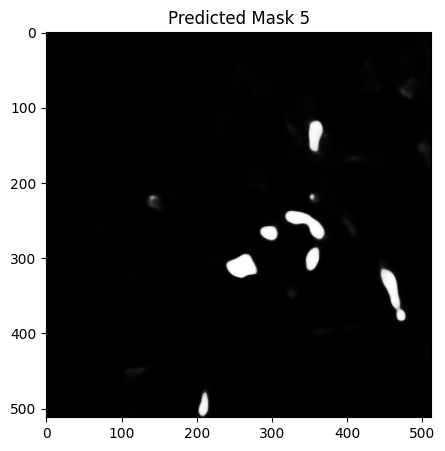

In [9]:
# Let's print and plot the first two predicted masks
for i in range(5):
    print(f'Predicted mask {i+1}:\n', predictions[i])
    
    plt.figure(figsize=(5,5))
    plt.imshow(predictions[i].squeeze(), cmap='gray')
    plt.title(f'Predicted Mask {i+1}')
    plt.show()

In [10]:
# Convert probabilities to binary mask
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

In [11]:
print(preprocessed_images.keys())

dict_keys(['0006ff2aa7cd', '00168d1b7522', '0033bbc76b6b', '003504460b3a', '004daf1cbe75', '005715f0a313', '00654cc08aac', '00656c6f2690', '0067d5ad2250', '00ca2f4c8918', '00d75ad65de3', '00da70813521', '00da8fdf2391', '00f560a6a72b', '014b60dfe193', '016c33dacfa1', '019390572feb', '01a7fca6263b', '025ec20b8b73', '0276eb166cce', '02cf5c2db152', '02d2022943a4', '02f563532696', '033a656390b2', '033e91059cec', '03d335057db3', '041588f936e1', '041ad8166762', '041b985201d6', '0478279e6e16', '04c08080b2ae', '04eaacfbb9f6', '055348e2fece', '0596bfb19322', '05dd21a61705', '06034408218a', '065ed4490163', '0667203ecaac', '0672b96aaccc', '06b972c417e7', '0717863ca2cb', '07199abc71ec', '072f5307f243', '0754412b2917', '0765f249adeb', '0788fc3be62e', '07b809228ef4', '07bdbe578ded', '0804072fa02a', '0828cc1c22be', '0870e4f9d580', '089a9e6be240', '08a1b468620a', '08e2fa7b08f0', '08ea167cfd5d', '08ed99cd1c93', '093a52e9bc1d', '09644decc895', '097dd2ed6c14', '09c06b79292c', '09d736c55365', '09df7e1fe1cc

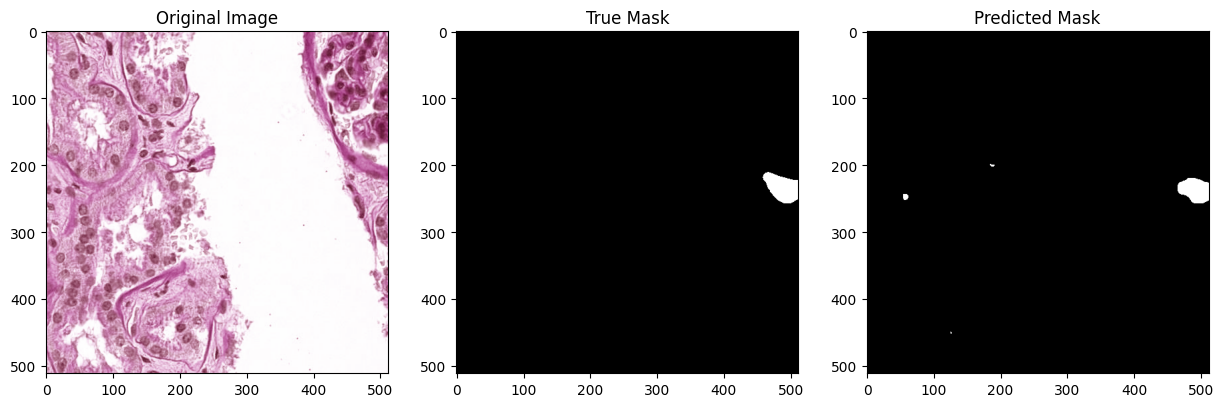

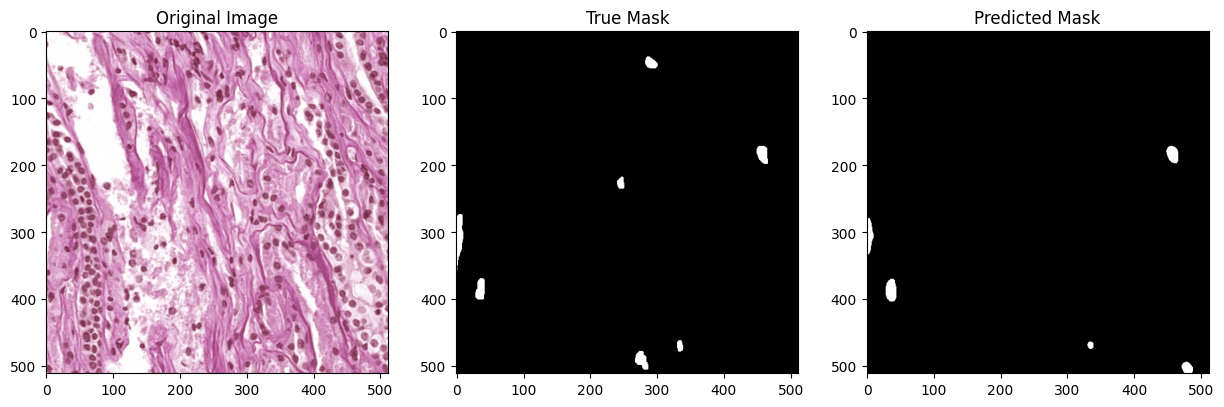

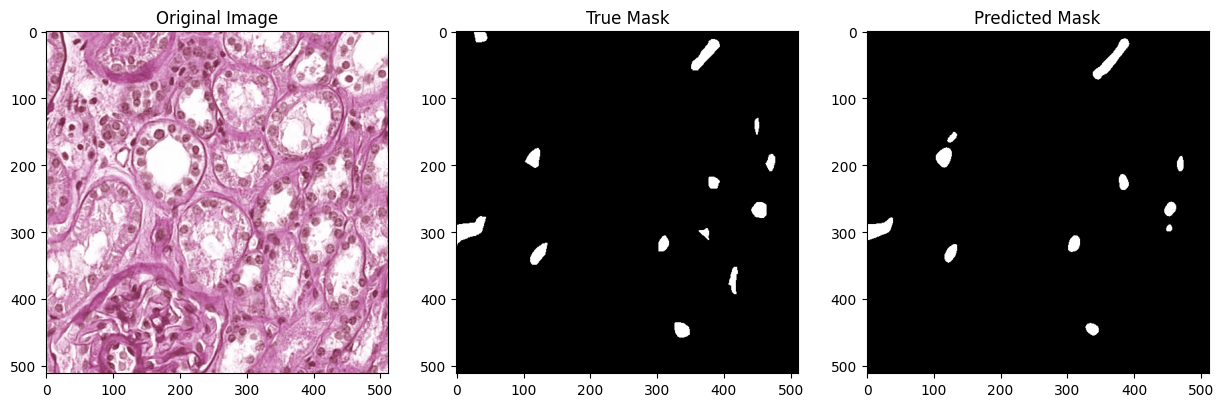

In [12]:
# Select a few test images
test_img_indices = [1, 3, 14]  # change these to select different images

for idx in test_img_indices:
    # Get the test image
    test_img = preprocessed_images[image_ids[idx]]

    # Get the predicted mask
    predicted_mask = binary_predictions[idx].squeeze()  # remove extra dimensions

    # Get the true mask
    true_mask = masks_blood_vessels[image_ids[idx]]

    # Plot the test image, its true mask, and its predicted mask
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(test_img)
    ax[0].title.set_text('Original Image')
    ax[1].imshow(true_mask, cmap='gray')
    ax[1].title.set_text('True Mask')
    ax[2].imshow(predicted_mask, cmap='gray')
    ax[2].title.set_text('Predicted Mask')
    plt.show()

In [13]:
# Save predictions
with open('/content/drive/MyDrive/Kaggle/HuBMAP - Hacking the Human Vasculature/predictions1.pkl', 'wb') as f:
    pickle.dump(binary_predictions, f)